<a href="https://colab.research.google.com/github/EstebanCabreraArbizu/CC57-Machine_Learning/blob/main/S2-Preprocesamiento%20de%20datos/01_Exploraci%C3%B3n_de_datos_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Docente: M.Sc. Richard Fernández

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [ ]:
data = pd.read_csv('D:/Bases/Kaggle/Social Network Ads/Social_Network_Ads.csv')

In [ ]:
data.shape

(400, 5)

In [ ]:
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#Tipos de variables
#Cualitativas
#Nominal: género, estado civil, etc => object
#Ordinal: nivel socioeconómico, grado de instrucción, etc => object

#Cuantitativas
#Discreta: edad, número de visitas a un banco, etc => int
#Continua: peso, estatura, etc => float

In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#1.Análisis Univariado

#media
data['Age'].mean()

37.655

In [ ]:
#mediana
data['Age'].median()

37.0

In [ ]:
#moda
data['Age'].mode()

0    35
dtype: int64

In [ ]:
#cuartiles
data['Age'].quantile()

37.0

In [ ]:
data['Age'].quantile([0])

0.0    18.0
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([1])

1.0    60.0
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([0.25])

0.25    29.75
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([0.50])

0.5    37.0
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([0.75])

0.75    46.0
Name: Age, dtype: float64

In [ ]:
#decil
data['Age'].quantile([0.10])

0.1    24.0
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([0.20])

0.2    28.0
Name: Age, dtype: float64

In [ ]:
data['Age'].quantile([0.90])

0.9    52.1
Name: Age, dtype: float64

In [ ]:
#rango
data['Age'].min()

18

In [ ]:
data['Age'].max()

60

In [ ]:
data['Age'].max()-data['Age'].min()

42

In [ ]:
#rango intercuartílico
data['Age'].quantile(0.75)-data['Age'].quantile(0.25)

16.25

In [ ]:
#varianza
data['Age'].var()

109.89070175438606

In [ ]:
#desviación estándar
data['Age'].std()

10.48287659730792

In [ ]:
data['Age'].std(ddof=0) #poblacional

10.469764801560734

In [ ]:
data['Age'].std(ddof=1) #muestral

10.48287659730792

In [ ]:
#coeficiente de variación => ¿Qué variable tiene mayor dispersión?
data['Age'].std(ddof=0)/data['Age'].mean()

0.27804447753447703

In [ ]:
#coeficiente de asimetría
ss.skew(data['Age'])

0.23046904236325927

In [ ]:
#coeficiente de curtosis
ss.kurtosis(data['Age'])

-0.6297213829600437

In [ ]:
#resumen
data['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

In [ ]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [ ]:
#Prueba de normalidad
#Ho: La variable se aproxima a una distribución normal
#Ha: La variable no se aproxima a una dsitribución normal

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, las variable no se aproxima a una distribución normal
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, las variable se aproxima a una distribución normal

ss.shapiro(data.EstimatedSalary)

ShapiroResult(statistic=0.9600138068199158, pvalue=5.734485331032602e-09)

In [ ]:
ss.shapiro(data.Age)

ShapiroResult(statistic=0.9785013198852539, pvalue=1.1638903743005358e-05)

In [ ]:
ss.normaltest(data.EstimatedSalary)

NormaltestResult(statistic=19.18964958710917, pvalue=6.808015523241932e-05)

In [ ]:
ss.normaltest(data.Age)

NormaltestResult(statistic=17.093306246119845, pvalue=0.00019419395640499378)

In [ ]:
#2.Análisis Bivariado
# coeficiente de correlación
# Si las variables se aproximan a una distribución normal => Pearson
# Si las variables no se aproximan a una distribución normal => Spearman
#data.corr()
#data.loc[:,['Age','EstimatedSalary']].corr(method = "pearson")
#data.loc[:,['Age','EstimatedSalary']].corr(method = "kendall")
data.loc[:,['Age','EstimatedSalary']].corr(method = "spearman")

,Age,EstimatedSalary
Age,1.000000,0.124824
EstimatedSalary,0.124824,1.000000


In [ ]:
#Prueba de correlación
#Ho: las variables no están correlacionadas
#Ha: las variables están correlacionadas

#Si el pvalor < 5% => Se rechaza la Ho, al 95% de confianza, las variables están correlacionadas
#Si el pvalor > 5% => No se rechaza la Ho, al 95% de confianza, las variables no están correlacionadas

In [ ]:
#ss.pearsonr(data['Age'],data['EstimatedSalary'])

In [ ]:
ss.spearmanr(data['Age'],data['EstimatedSalary'])

SpearmanrResult(correlation=0.12482434405192087, pvalue=0.01247367042800823)

In [ ]:
#ss.kendalltau(data['Age'],data['EstimatedSalary'])

In [ ]:
#np.corrcoef(data['Age'],data['EstimatedSalary'])

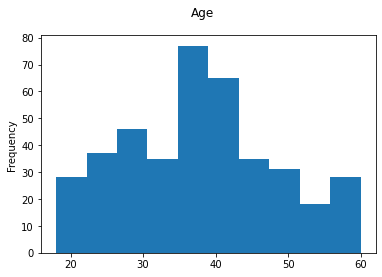

In [ ]:
#3.Visualización de datos

#Histograma
data['Age'].plot(kind='hist',bins=10,title='Age',subplots=True)
plt.show()

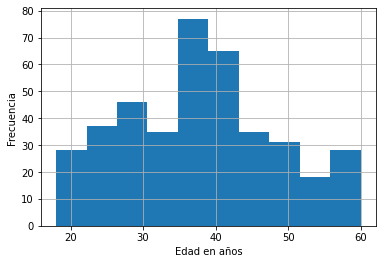

In [ ]:
data['Age'].hist(bins=10)
plt.xlabel("Edad en años")
plt.ylabel("Frecuencia")
plt.show()

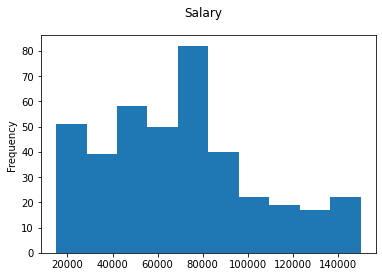

In [ ]:
data['EstimatedSalary'].plot(kind='hist',bins=10,title='Salary',subplots=True)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


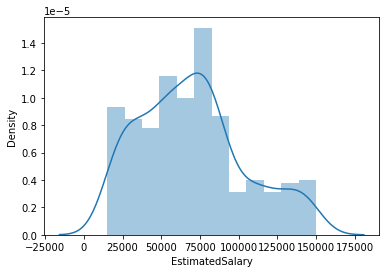

In [ ]:
sns.distplot(data['EstimatedSalary'])
plt.show()

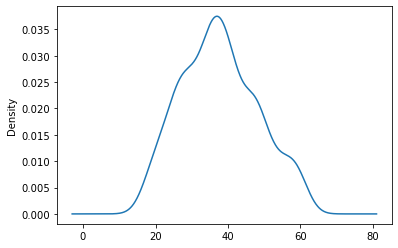

In [ ]:
#Densidad
data['Age'].plot(kind='density')
plt.show()

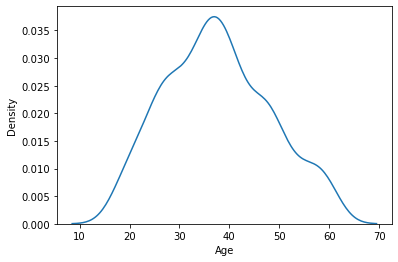

In [ ]:
sns.kdeplot(data['Age'])
plt.show()

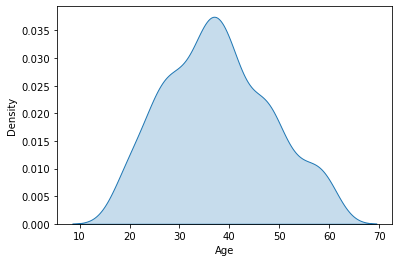

In [ ]:
sns.kdeplot(data['Age'],shade=True)
plt.show()

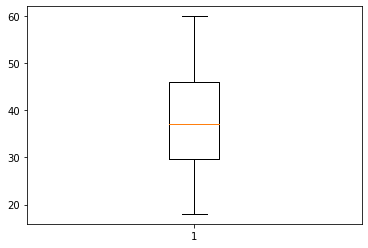

In [ ]:
#Boxplot
plt.boxplot(data['Age'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


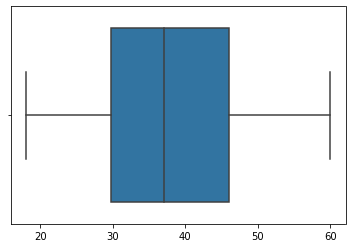

In [ ]:
sns.boxplot(list(data['Age']))
plt.show()

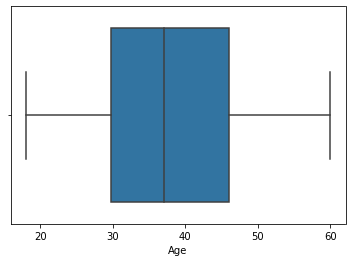

In [ ]:
sns.boxplot(x='Age',data=data)
plt.show()

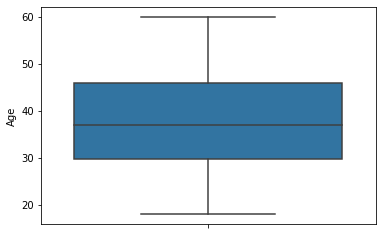

In [ ]:
sns.boxplot(y='Age',data=data)
plt.show()

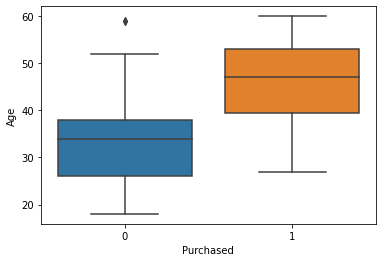

In [ ]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

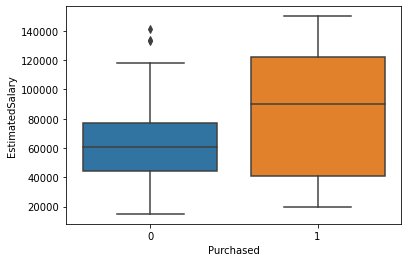

In [ ]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

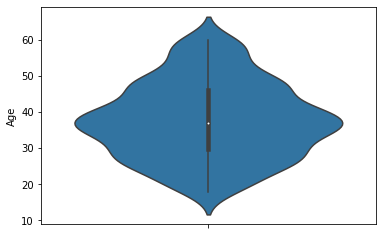

In [ ]:
#Violin Plot
sns.violinplot(y='Age',data=data)
plt.show()

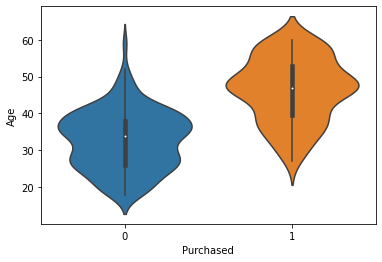

In [ ]:
sns.violinplot(x='Purchased',y='Age',data=data)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


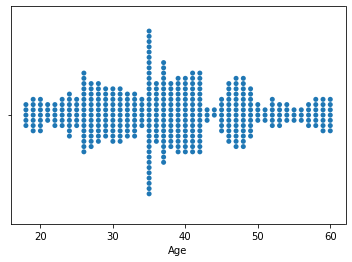

In [ ]:
#Swarm Plot
sns.swarmplot(data['Age'])
plt.show()

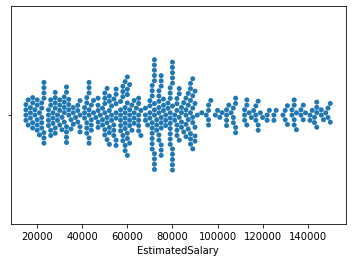

In [ ]:
sns.swarmplot(x=data['EstimatedSalary'])
plt.show()

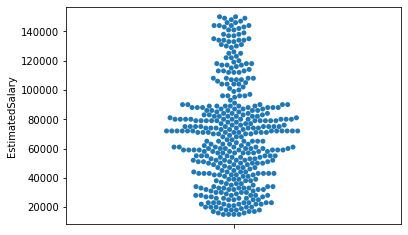

In [ ]:
sns.swarmplot(y=data['EstimatedSalary'])
plt.show()

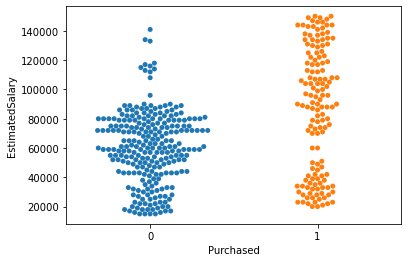

In [ ]:
sns.swarmplot(y=data['EstimatedSalary'],x=data['Purchased'])
plt.show()

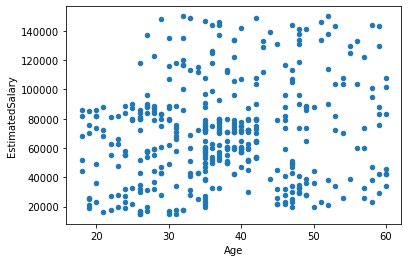

In [ ]:
#Gráfico de dispersión
data.plot(kind='scatter', x='Age', y='EstimatedSalary')
plt.show()

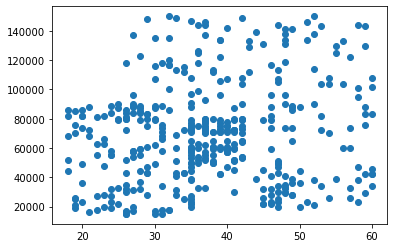

In [ ]:
plt.scatter(data['Age'],data['EstimatedSalary'])
plt.show()

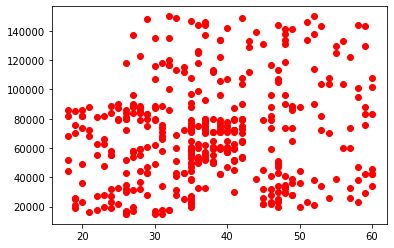

In [ ]:
plt.plot(data['Age'],data['EstimatedSalary'],"ro")
plt.show()

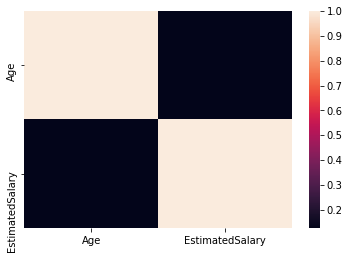

In [ ]:
#Heatmap
sns.heatmap(data.loc[:,['Age','EstimatedSalary']].corr(method = "spearman"))
plt.show()

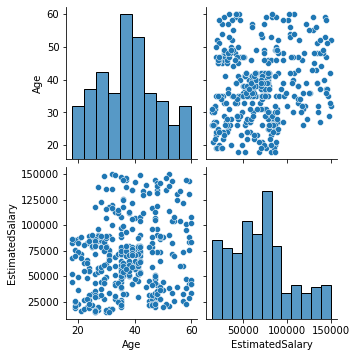

In [ ]:
#Resumen
sns.pairplot(data.loc[:,['Age','EstimatedSalary']])
plt.show()

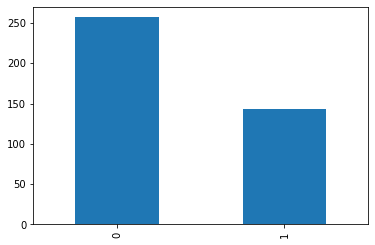

In [ ]:
#Bar Chart
data['Purchased'].value_counts().plot.bar()
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


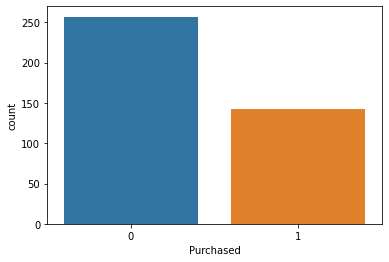

In [ ]:
sns.countplot(data['Purchased'])
plt.show()

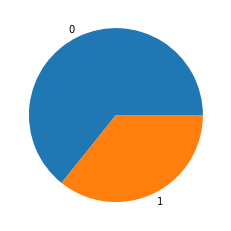

In [ ]:
#Pie Chart
plt.pie(data['Purchased'].value_counts(),labels=['0','1'])
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


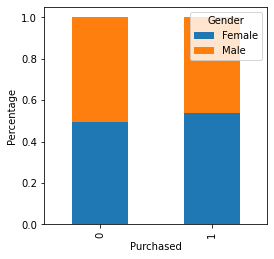

In [ ]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [ ]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables

In [ ]:
contigencia = pd.crosstab(data['Purchased'], data['Gender'])
c, p, dof, expected = chi2_contingency(contigencia)
print(p)

0.45624659183130645
